<a href="https://colab.research.google.com/github/kanishk16/First-Step-to-Computer-Vision/blob/master/OpenCV_with_Python_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow

# version check
cv.__version__

'3.4.3'

In [2]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://pythonprogramming.net/static/images/opencv/bookpage.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png
# https://github.com/vishwajeetsinghrana8/OpenCV/blob/master/Hand_Gesture/Capture.png?raw=true

URL: https://github.com/vishwajeetsinghrana8/OpenCV/blob/master/Hand_Gesture/Capture.png?raw=true
File Name: hand_ges


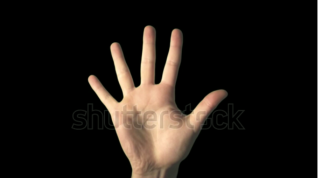

In [50]:
# load an img
img1 = cv.imread('hand_ges.jpg', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, None, None, 0.35, 0.35, interpolation = cv.INTER_AREA)

cv_imshow(imgr1)

In [0]:
# convert to HSV
hsv_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2HSV)

# display
cv_imshow(hsv_imgr1)

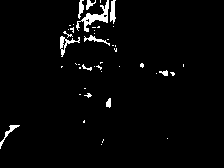

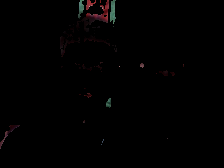

In [5]:
lower_red = np.array([70,70,0])
upper_red = np.array([255,255,255])

# checks if arg_2 < img.(arg_1)elements < arg_3 and sets each of them in the range to 1 rest to 0   
mask = cv.inRange(hsv_imgr1, lower_red, upper_red)
# help(cv.inRange)
cv_imshow(mask)

# display the colors from the img. at places where mask=1
mask_imgr1 = cv.bitwise_and(imgr1, imgr1, mask = mask)
cv_imshow(mask_imgr1)


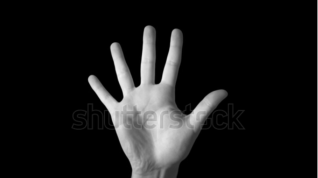

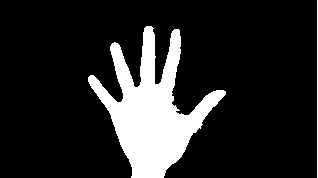

In [51]:
# convert to gray-scale & then applying threshold to it
gray_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2GRAY)

# returns a new thresholded img.   
retval, threshold = cv.threshold(gray_imgr1, 70, 255, cv.THRESH_BINARY)

cv_imshow(gray_imgr1)
cv_imshow(threshold)

####CONTOURS
> (WHAT?)the line joining all the points along the boundary of an image that are having the same intensity

> `cv.findContours(binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)`
* returns all the points along the boundary of an image that have the same intensity
  
  > `cv.drawContours(src_img, contours, contourIdx, colour, thickness)`
  * draws the contour(s) with set of pts. extracted using findContours fn.
  * src_img = destination image for the contour to be drawn 
  * contours =  set of input contours (each contour is stored as a point vector)
  * contourIdx = indicating a contour to draw -1: draw all the contours
  * color(B,G,R) = color of the contours.
  * thickness = thickness of contour lines -1:#FILLED, the contour interiors are drawn

  > References: [find n draw Contours](https://www.youtube.com/watch?v=_aTC-Rc4Io0&list=PL6Yc5OUgcoTmTGACTa__vnifNA744Cz-q&index=20&t=480s)

contours: <class 'list'> image: <class 'numpy.ndarray'>


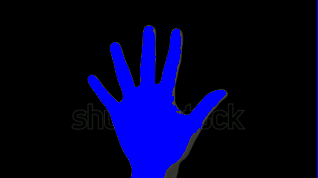

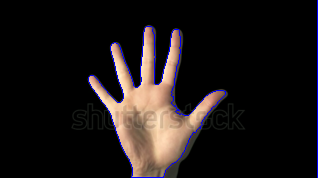

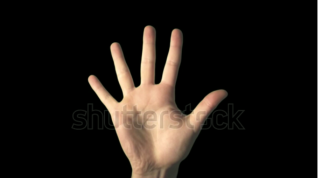

In [52]:
_imgrc1, contours, hierarchy = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print('contours:',type(contours), 'image:',type(_imgrc1))
# for v>3.2 src img. isn't modified by this fn. 
# cv_imshow(_imgrc1)

# OUTPUT: Hence, NO EFFECT 
# rgb_imgrc1 = cv.cvtColor(_imgrc1, cv.COLOR_GRAY2BGR)
# cv_imshow(rgb_imgrc1)
# help(cv.findContours)

# draws the contour for the set of points on the img. passed as parameter 
# _contour_imgr1 = imgr1.copy()
_contour_imgr1 = cv.drawContours(imgr1.copy(), contours, -1, (255,0,0), -1)
cv_imshow(_contour_imgr1)

_contour_imgr2 = cv.drawContours(imgr1.copy(), contours, -1, (255,0,0))
cv_imshow(_contour_imgr2)

# orig. img.
cv_imshow(imgr1)

# convert to rgb to visualize the drawn contour 
# contour_imgrc1 = cv.cvtColor(_contour_imgr1, cv.COLOR_GRAY2RGB)
# OUTPUT: NO EFFECT (WHY?)
# cv_imshow(_contour_imgr1)


#### Convex Hull
>(convex hull of the set) the smallest convex polygon that contains all the points of it = finds and connects the outer-most boundary pixel values  

> `cv.convexHull(contour)` 

[array([[[225,  94]],

       [[181, 156]],

       [[163, 177]],

       [[131, 177]],

       [[ 88,  81]],

       [[ 88,  77]],

       [[111,  44]],

       [[112,  43]],

       [[146,  26]],

       [[151,  26]],

       [[178,  29]],

       [[179,  30]],

       [[225,  91]]], dtype=int32), array([[[317, 177]],

       [[317,   0]]], dtype=int32)]


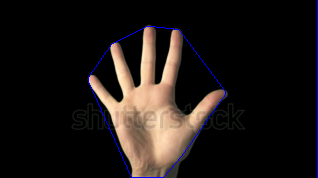

In [54]:
# find the (subset)pts. to create a set for drawing the contour(s)
hull = [cv.convexHull(contour) for contour in contours]
print(hull)

# draws the contour for the subset of points(hull) on the img. passed as parameter  
contour_imgr1 = cv.drawContours(imgr1.copy(), hull, -1, (255,0,0))
cv_imshow(contour_imgr1)